In [2]:
from encoder_decoder_correlations import EncoderDecoderComparison
import torch

from captum.attr import GradientShap, IntegratedGradients, Saliency
import pandas as pd
import numpy as np

In [3]:
# Define globals
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Gradshap

In [3]:
gradient_shap_experiment = EncoderDecoderComparison(
    model_name="",
    attributer_factory=GradientShap,
    dataset='MNIST',
    device = DEVICE,
)

Loading data...
Loading Models and Calculating Attributions...
Loading model in ../TrainedModels/MNIST/Classifier_run1.pt
Loading model in ../TrainedModels/MNIST/Classifier_run0.pt
Loading model in ../TrainedModels/MNIST/Classifier_run2.pt
Loading model in ../TrainedModels/MNIST/Classifier_run3.pt
Loading model in ../TrainedModels/MNIST/Classifier_run4.pt
Complete


In [4]:
gs_pearsons = gradient_shap_experiment.get_all_model_pearsons(True)

In [5]:
gs_pearsons_mean = gs_pearsons.mean(axis=1)

[0.3503069  0.32580192 0.32778726 0.36071626 0.32253383]


## Integrated Gradients

In [6]:
ig_experiment = EncoderDecoderComparison(
    model_name="",
    attributer_factory=IntegratedGradients,
    dataset='MNIST',
    device = DEVICE,
)

Loading data...
Loading Models and Calculating Attributions...
Loading model in ../TrainedModels/MNIST/Classifier_run1.pt
Loading model in ../TrainedModels/MNIST/Classifier_run0.pt
Loading model in ../TrainedModels/MNIST/Classifier_run2.pt
Loading model in ../TrainedModels/MNIST/Classifier_run3.pt
Loading model in ../TrainedModels/MNIST/Classifier_run4.pt
Complete


In [7]:
ig_pearsons = ig_experiment.get_all_model_pearsons(True)
ig_pearsons_mean = ig_pearsons.mean(axis=1)
ig_pearsons_mean

array([0.39079937, 0.47364313, 0.45926487, 0.42462469, 0.41964185])

## Saliency

In [8]:
sal_experiment = EncoderDecoderComparison(
    model_name="",
    attributer_factory=Saliency,
    dataset='MNIST',
    device = DEVICE,
)

Loading data...
Loading Models and Calculating Attributions...
Loading model in ../TrainedModels/MNIST/Classifier_run1.pt


/home/laurens/Desktop/FACT/Label-Free-XAI/my_env/lib/python3.8/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


Loading model in ../TrainedModels/MNIST/Classifier_run0.pt
Loading model in ../TrainedModels/MNIST/Classifier_run2.pt
Loading model in ../TrainedModels/MNIST/Classifier_run3.pt
Loading model in ../TrainedModels/MNIST/Classifier_run4.pt
Complete


In [9]:
sal_pearsons = sal_experiment.get_all_model_pearsons(True)
sal_pearsons_mean = sal_pearsons.mean(axis=1)
sal_pearsons_mean

array([0.21530681, 0.13549975, 0.16179986, 0.16258512, 0.20697079])

### Plot results for paper

In [4]:
# # Note this is done to load the results without rerunning the experiment - leave commented out if
# # Done from scatch
ig_pearsons_mean = np.array([0.39079937, 0.47364313, 0.45926487, 0.42462469, 0.41964185])
sal_pearsons_mean = np.array([0.21530681, 0.13549975, 0.16179986, 0.16258512, 0.20697079])
gs_pearsons_mean = np.array([0.3503069, 0.32580192, 0.32778726, 0.36071626, 0.32253383])

In [5]:
# One can either plot R-squared (proportion of variance explained) or the raw pearson correelation coefficient
PLOT_R_SQUARED = False

data = {'Integrated Gradients': ig_pearsons_mean,
        'Saliency': sal_pearsons_mean,
        'Gradient Shap': gs_pearsons_mean}

df = pd.DataFrame.from_dict(data)

if PLOT_R_SQUARED:
    df = df**2 # Convert to R2 values
df.index.name = 'Run'

In [6]:
# Compute means and error bars
agg_df = df.agg(['mean', 'sem']).T
agg_df['ci_width'] =+1.96*agg_df['sem']
agg_df['upper_ci'] = agg_df['mean'] + agg_df['ci_width']
agg_df['lower_ci'] = agg_df['mean'] - agg_df['ci_width']

# agg_df = agg_df.T

<AxesSubplot: ylabel='Pearson Correlation Coefficient'>

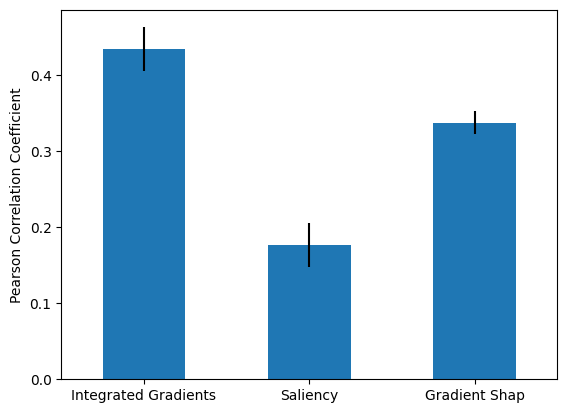

In [7]:
ylabel = 'R-squared' if PLOT_R_SQUARED else 'Pearson Correlation Coefficient'
agg_df.plot(y='mean',
            kind='bar',
            rot=0,
            ylabel=ylabel,
            yerr=agg_df['ci_width'],
            legend=False,
            # ylim=(0, 1),
            )

In [42]:
agg_df

,mean,sem,ci_width,upper_ci,lower_ci
Integrated Gradients,0.433595,0.014781,0.028970,0.462565,0.404624
Saliency,0.176432,0.015042,0.029482,0.205915,0.146950
Gradient Shap,0.337429,0.007610,0.014915,0.352344,0.322514
